In [31]:
import pandas as pd
import networkx as nx

data = pd.read_csv("data.csv")
data_2000 = data.loc[data['iyear'] == 2000]
data_2010 = data.loc[data['iyear'] == 2010]

# Граф для 2010 года

In [32]:
import matplotlib.pyplot as plt

In [33]:
graph_2010 = nx.Graph()
for idd, elem in data_2010.iterrows():
    station1_name = idd
    if not pd.isna(elem.related):
        lst = elem.related
        lst = lst.replace(' ', '').split(',')
        for obj in lst:
            graph_2010.add_edge(str(station1_name), obj, time = 1)


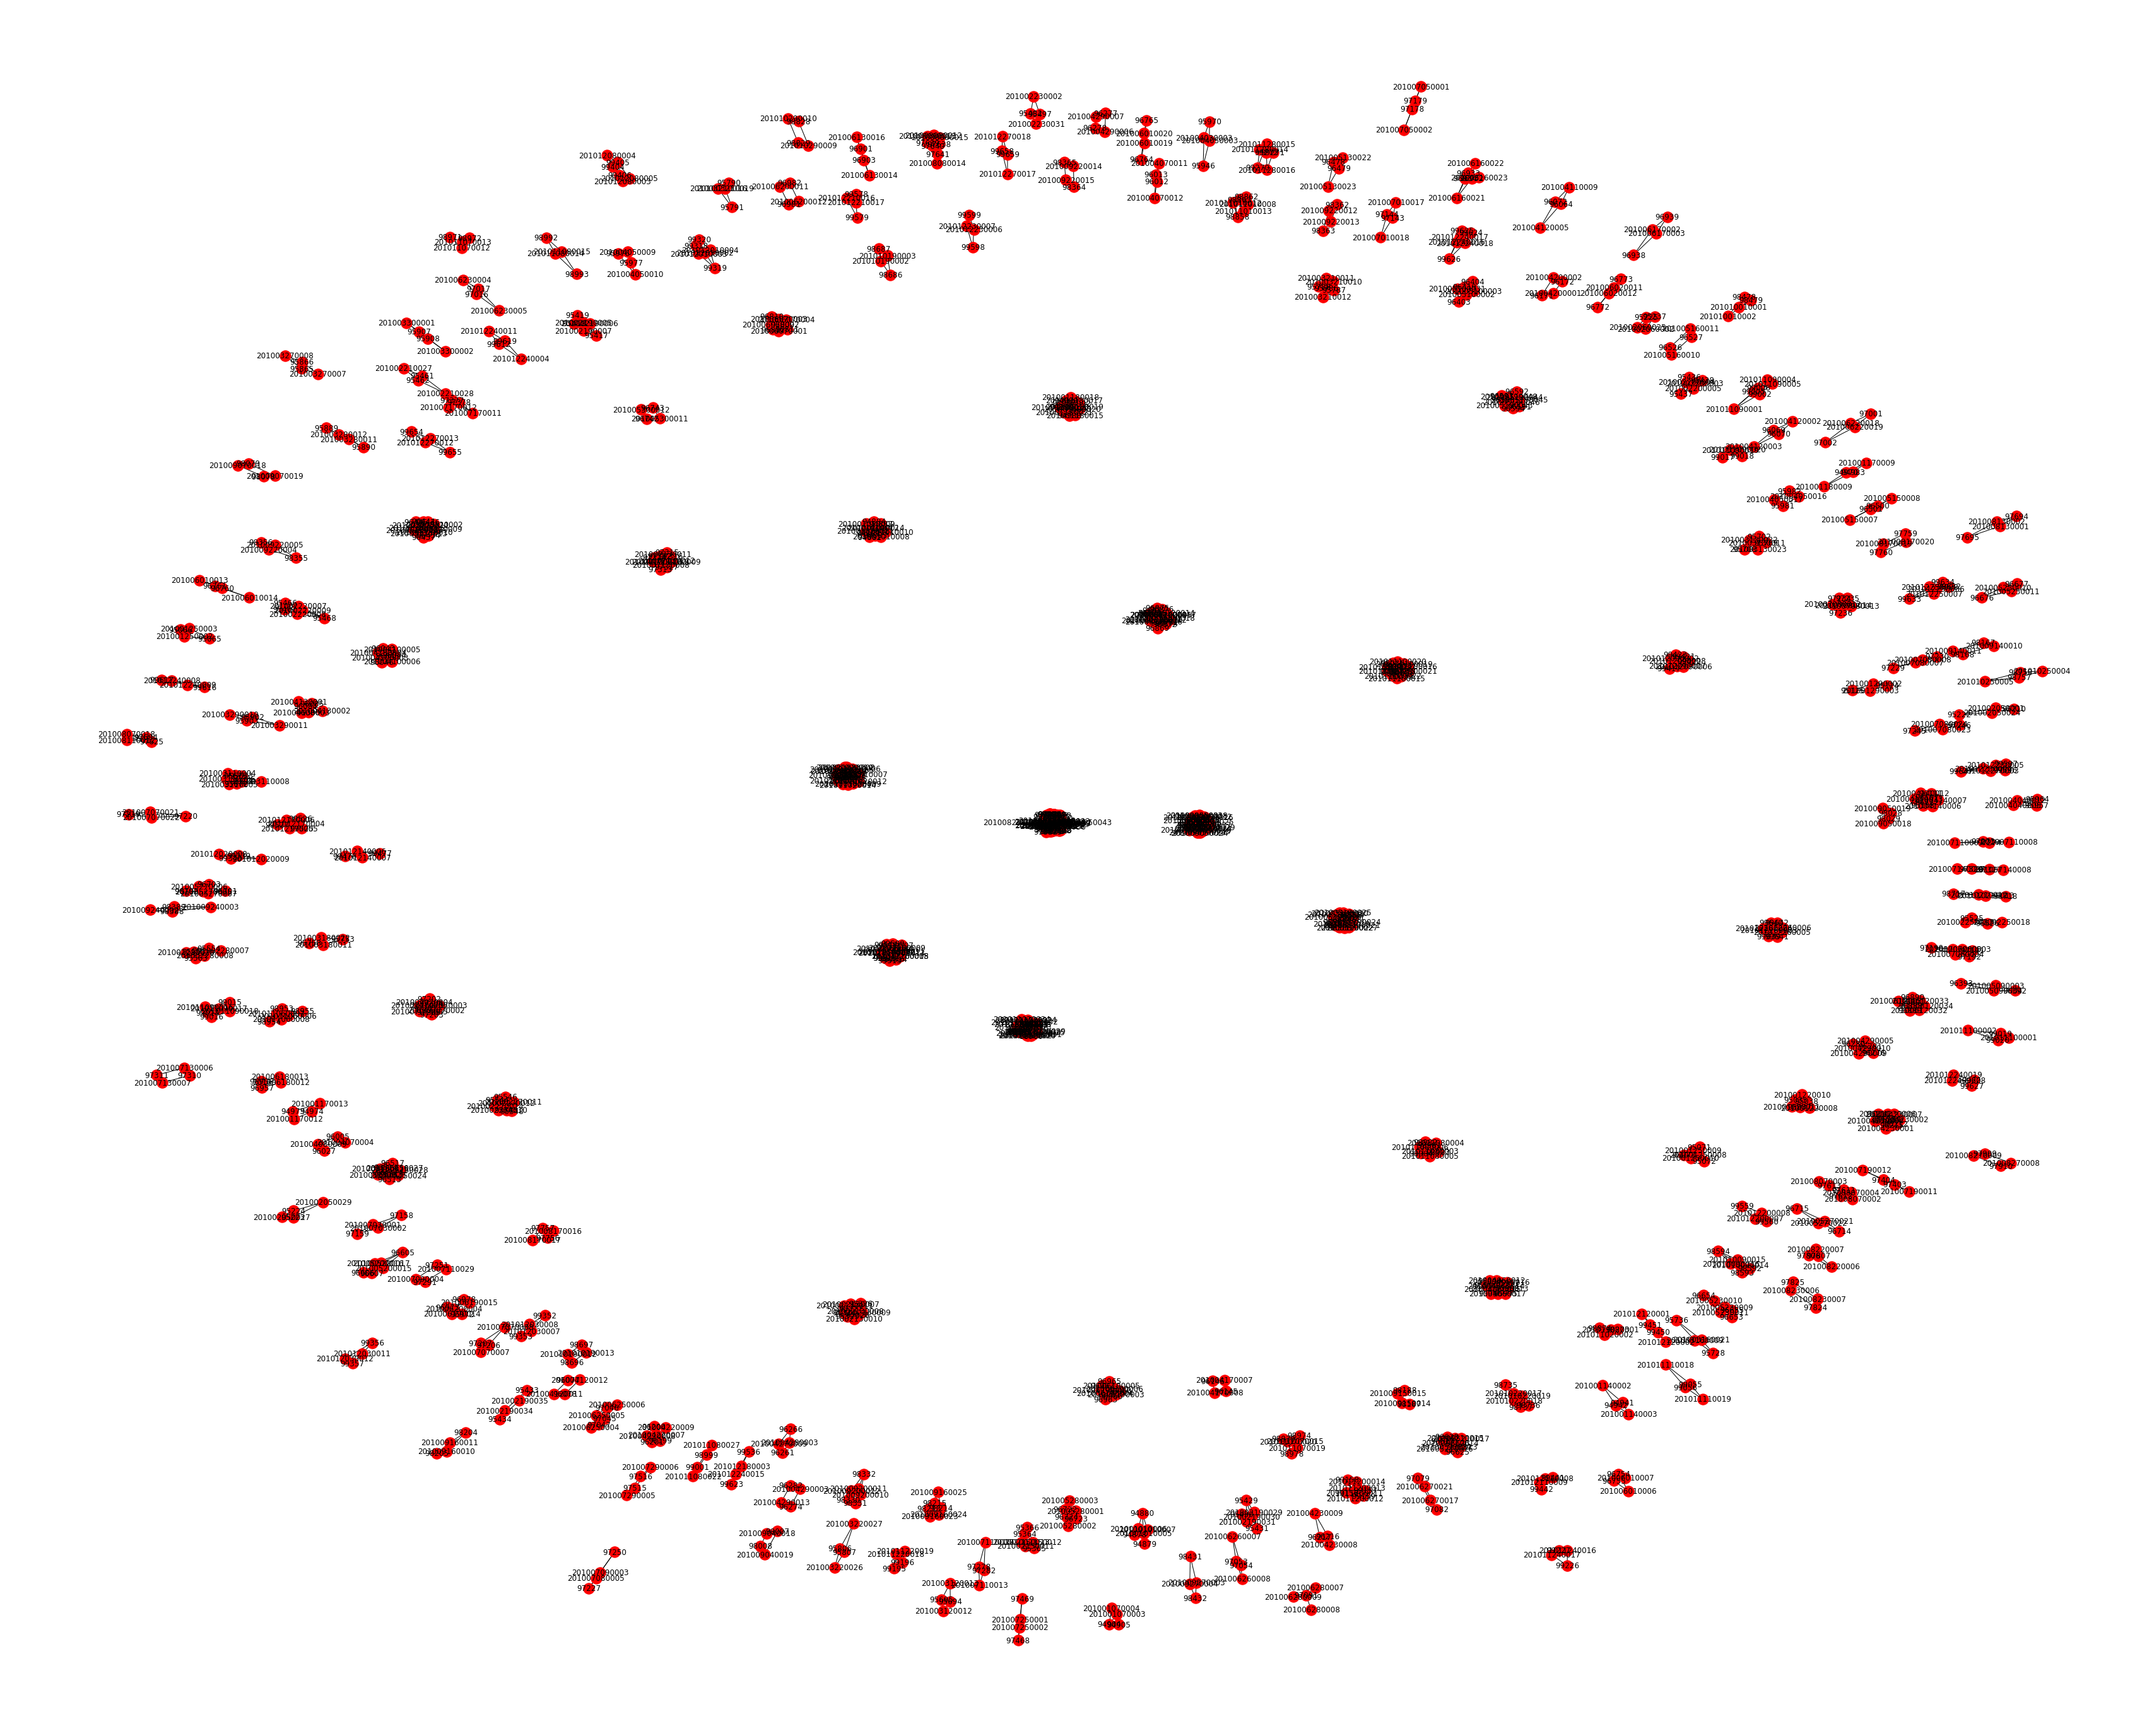

In [34]:
fig = plt.figure(figsize=(60, 50))
ax = fig.add_subplot(1, 1, 1)
nx.draw(graph_2010, ax=ax, with_labels=True)

In [35]:
connected_comp = sorted(nx.connected_components(graph_2010), key = len, reverse=True)

In [36]:
for i in range(1, 15):
    graph_2010.add_edge(list(connected_comp[i - 1])[0], list(connected_comp[i])[0], time = 1)

<class 'networkx.classes.graph.Graph'>


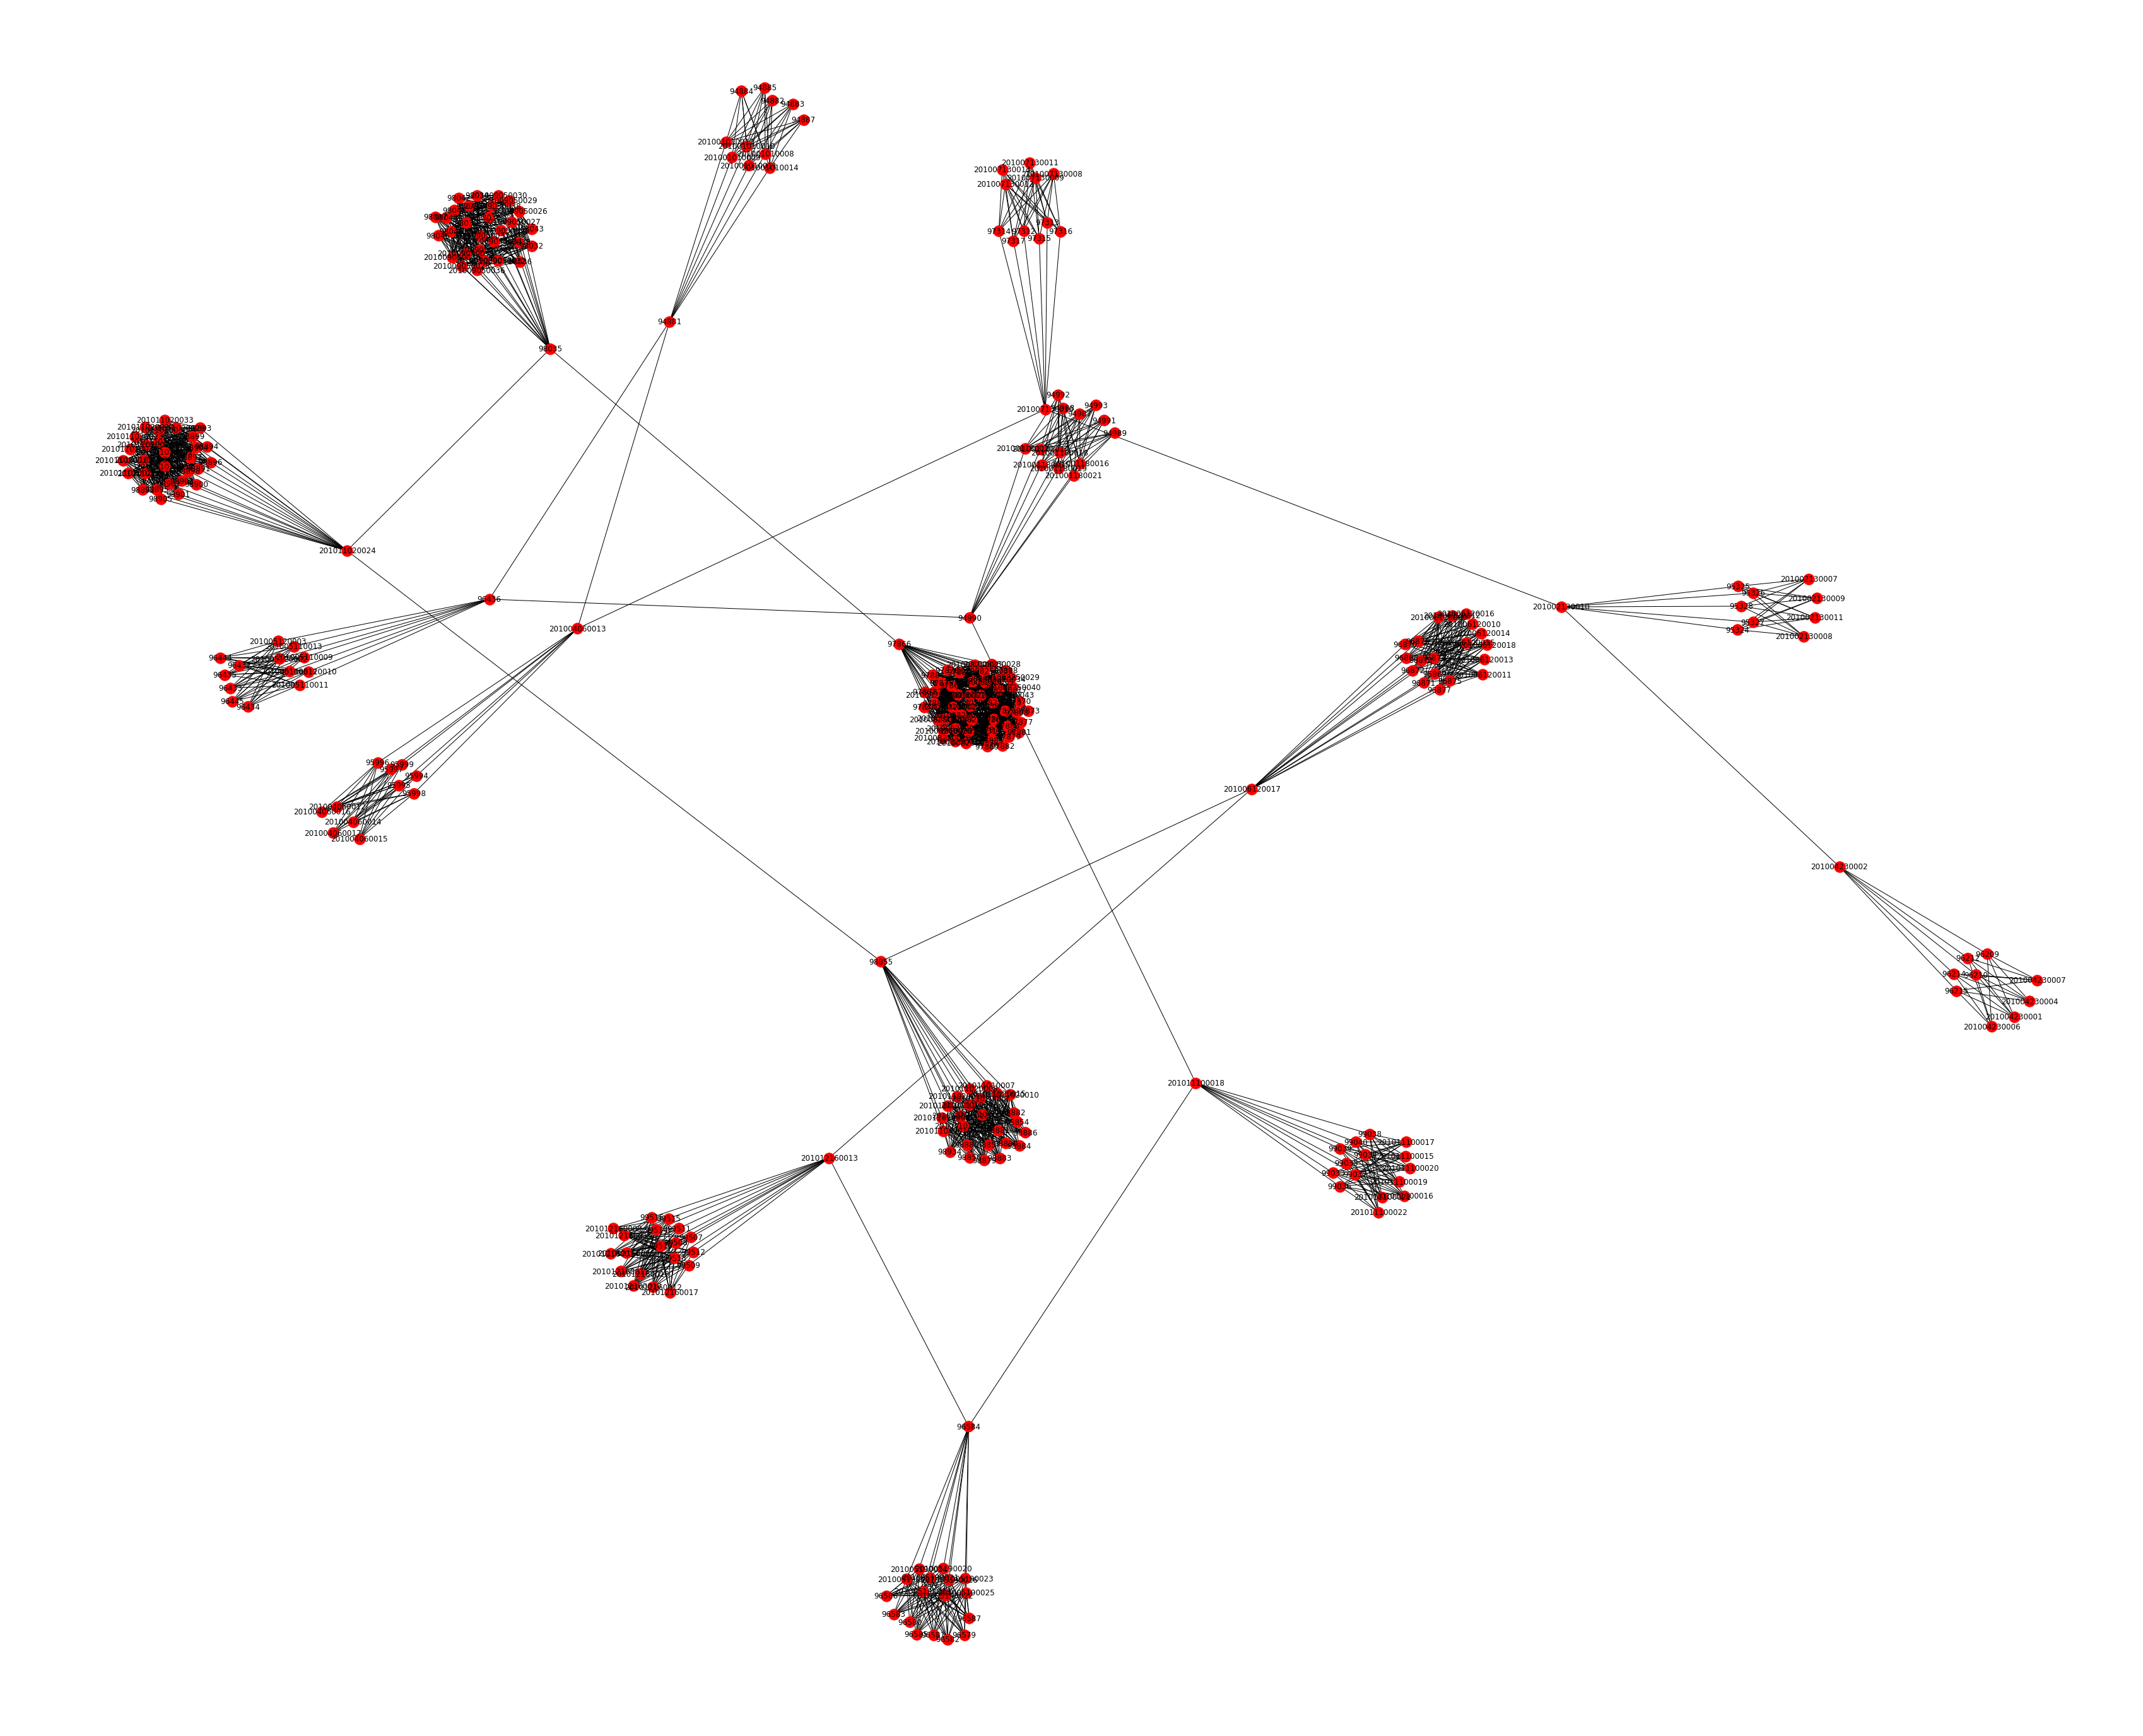

In [37]:
graph_2010 = max(nx.connected_component_subgraphs(graph_2010), key = len)
print(type(graph_2010))
fig = plt.figure(figsize=(60, 50))
ax = fig.add_subplot(1, 1, 1)
nx.draw(graph_2010, ax=ax, with_labels=True)

In [38]:
nx.is_connected(graph_2010)

True

граф связный

In [39]:
list(nx.isolates(graph_2010))

[]

Значит изолированных вершин нет

In [40]:
list(graph_2010.selfloop_edges())

[]

петель нет

In [41]:
import numpy as np
# ищем мульти ребра
arr = np.asarray(list(graph_2010.edges()))
arr = np.core.defchararray.add(np.core.defchararray.add(arr[:, 0], [',' for i in range(len(arr))]), arr[:, 1])

unique_edges, counts = np.unique(arr, return_counts=True)
flag = -1
for i in range(len(counts)):
    if counts[i] != 1:
        flag = i
        print(i)
if flag == -1:
    print('Graph doesn`t have multiple edges')

Graph doesn`t have multiple edges


# Граф для 2000 года

In [42]:
graph_2000 = nx.Graph()
for idd, elem in data_2000.iterrows():
    station1_name = idd
    if not pd.isna(elem.related):
        lst = elem.related
        lst = lst.replace(' ', '').split(',')
        for obj in lst:
            graph_2000.add_edge(str(station1_name), obj, time = 1)


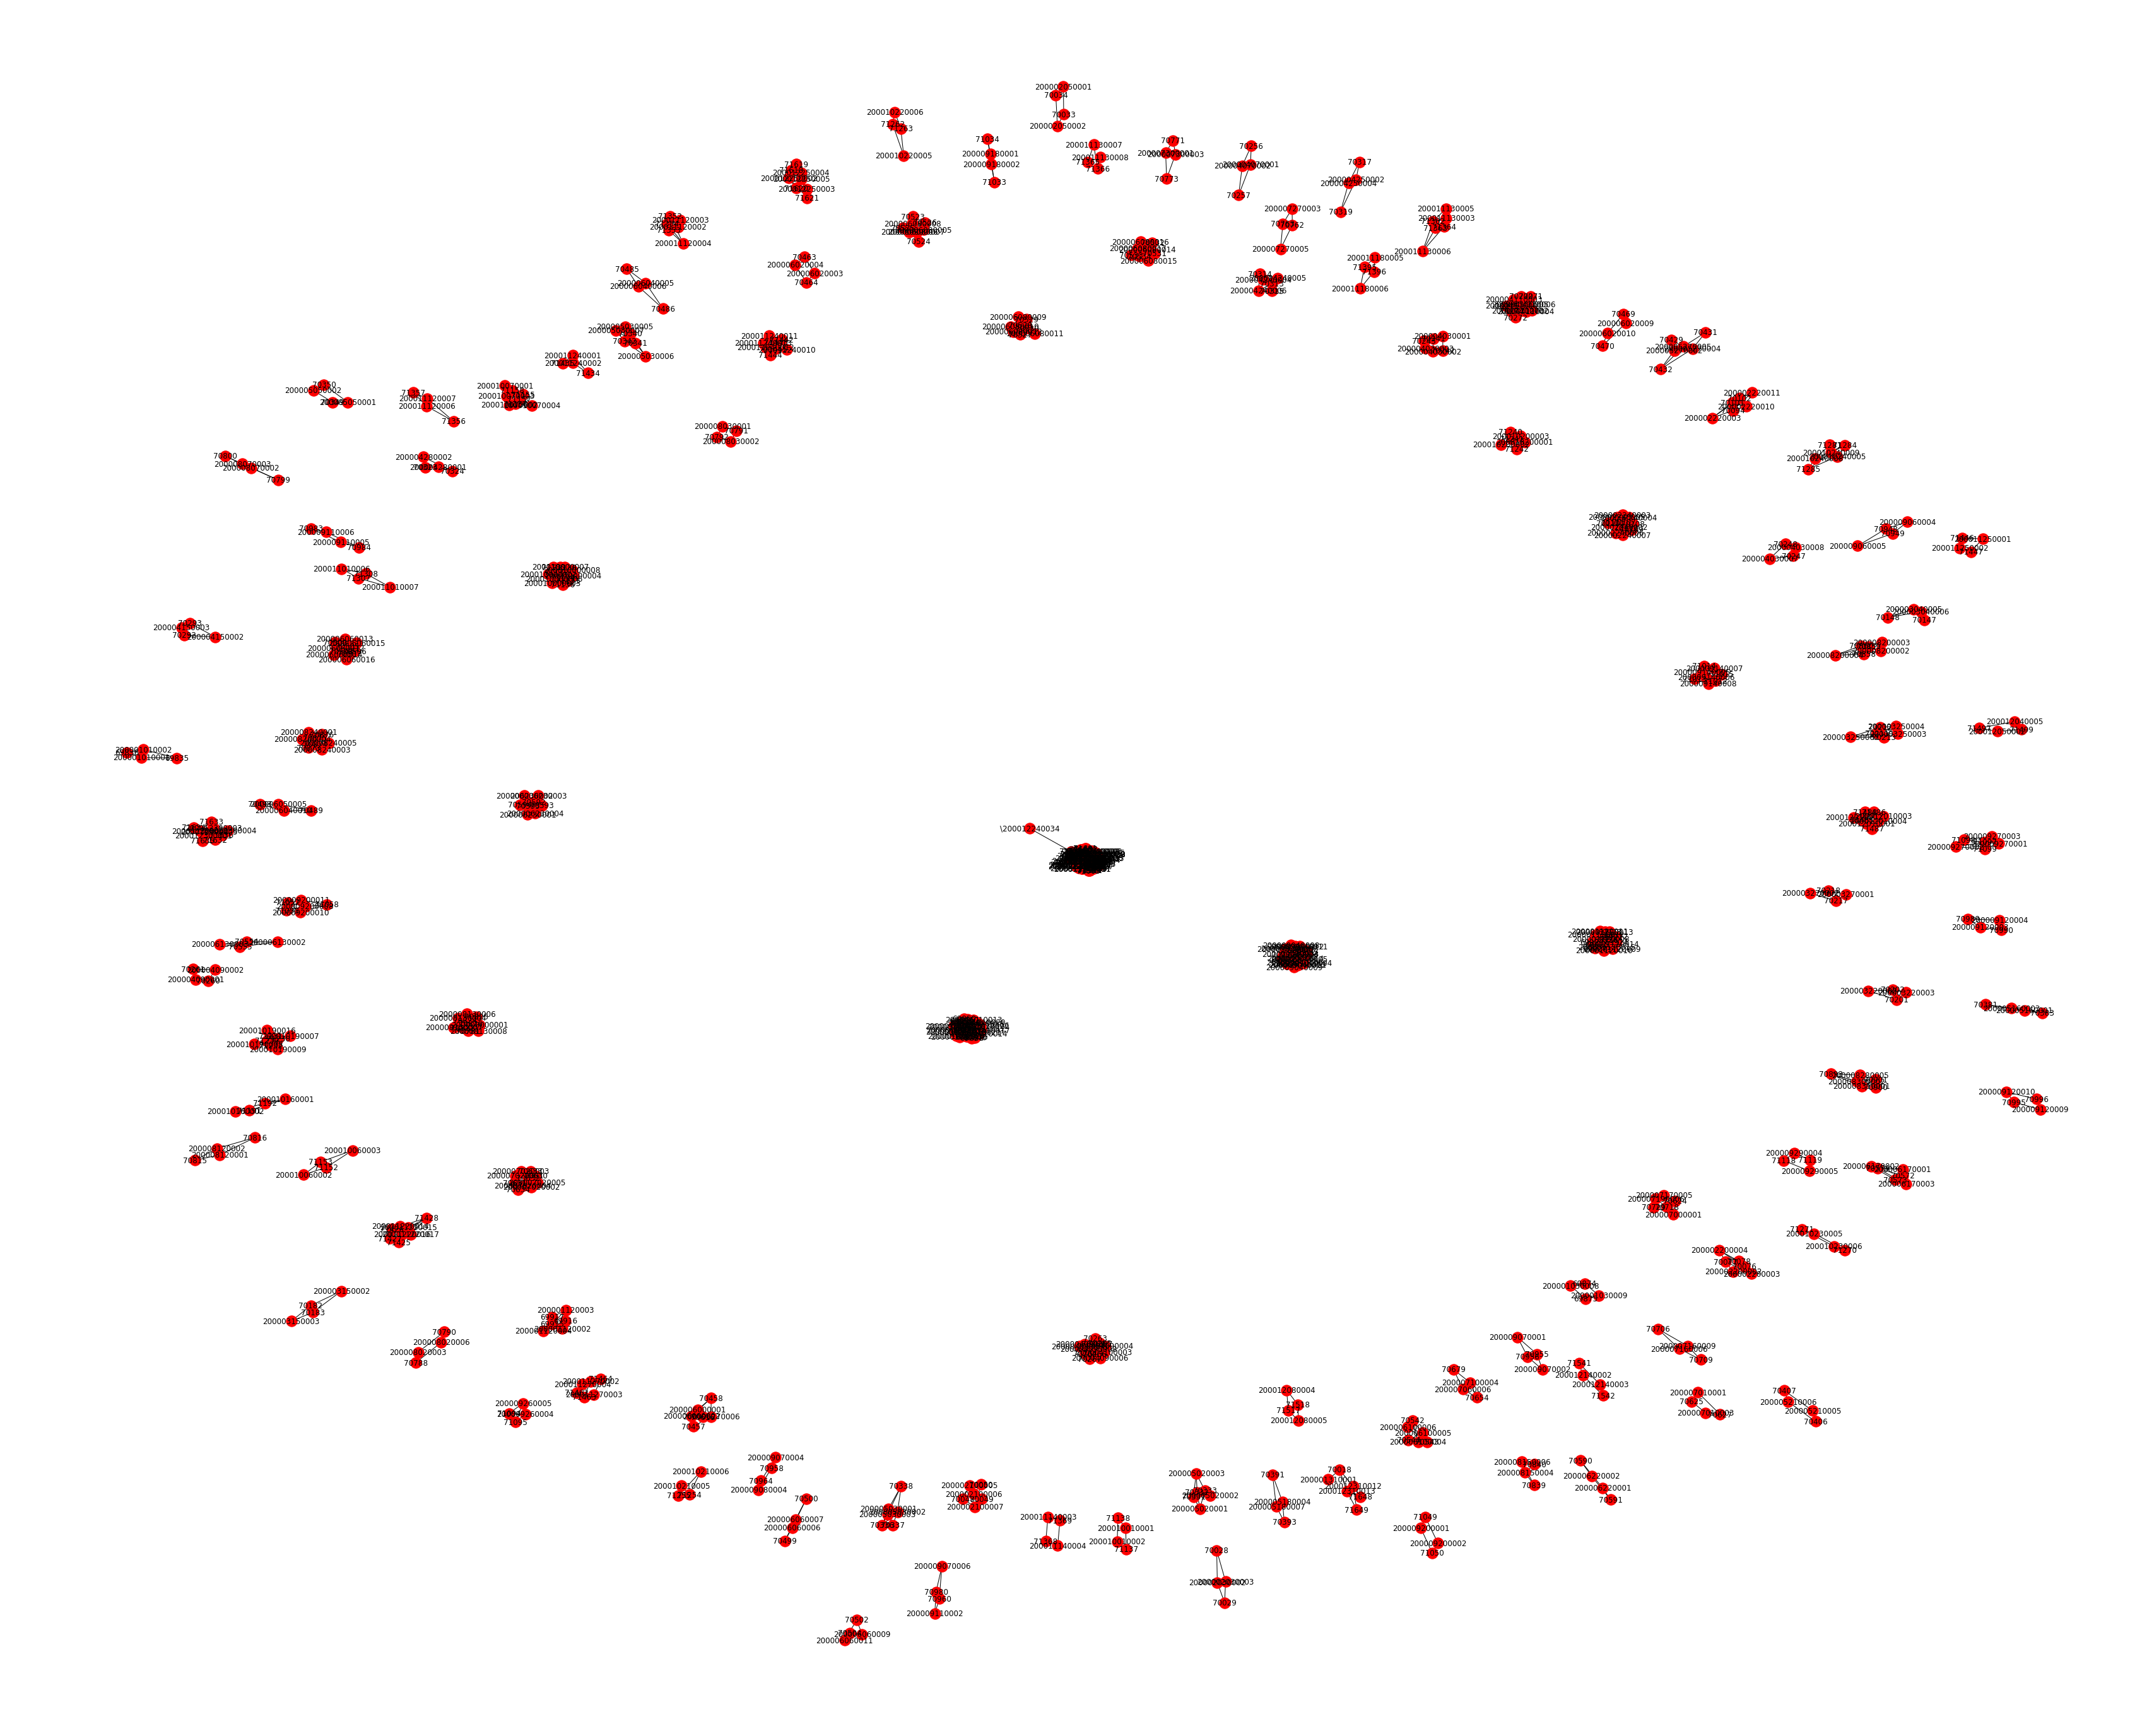

In [43]:
fig = plt.figure(figsize=(60, 50))
ax = fig.add_subplot(1, 1, 1)
nx.draw(graph_2000, ax=ax, with_labels=True)

In [44]:
connected_comp = sorted(nx.connected_components(graph_2000), key = len, reverse=True)

In [45]:
for i in range(1, 15):
    graph_2000.add_edge(list(connected_comp[i - 1])[0], list(connected_comp[i])[0], time = 1)

<class 'networkx.classes.graph.Graph'>


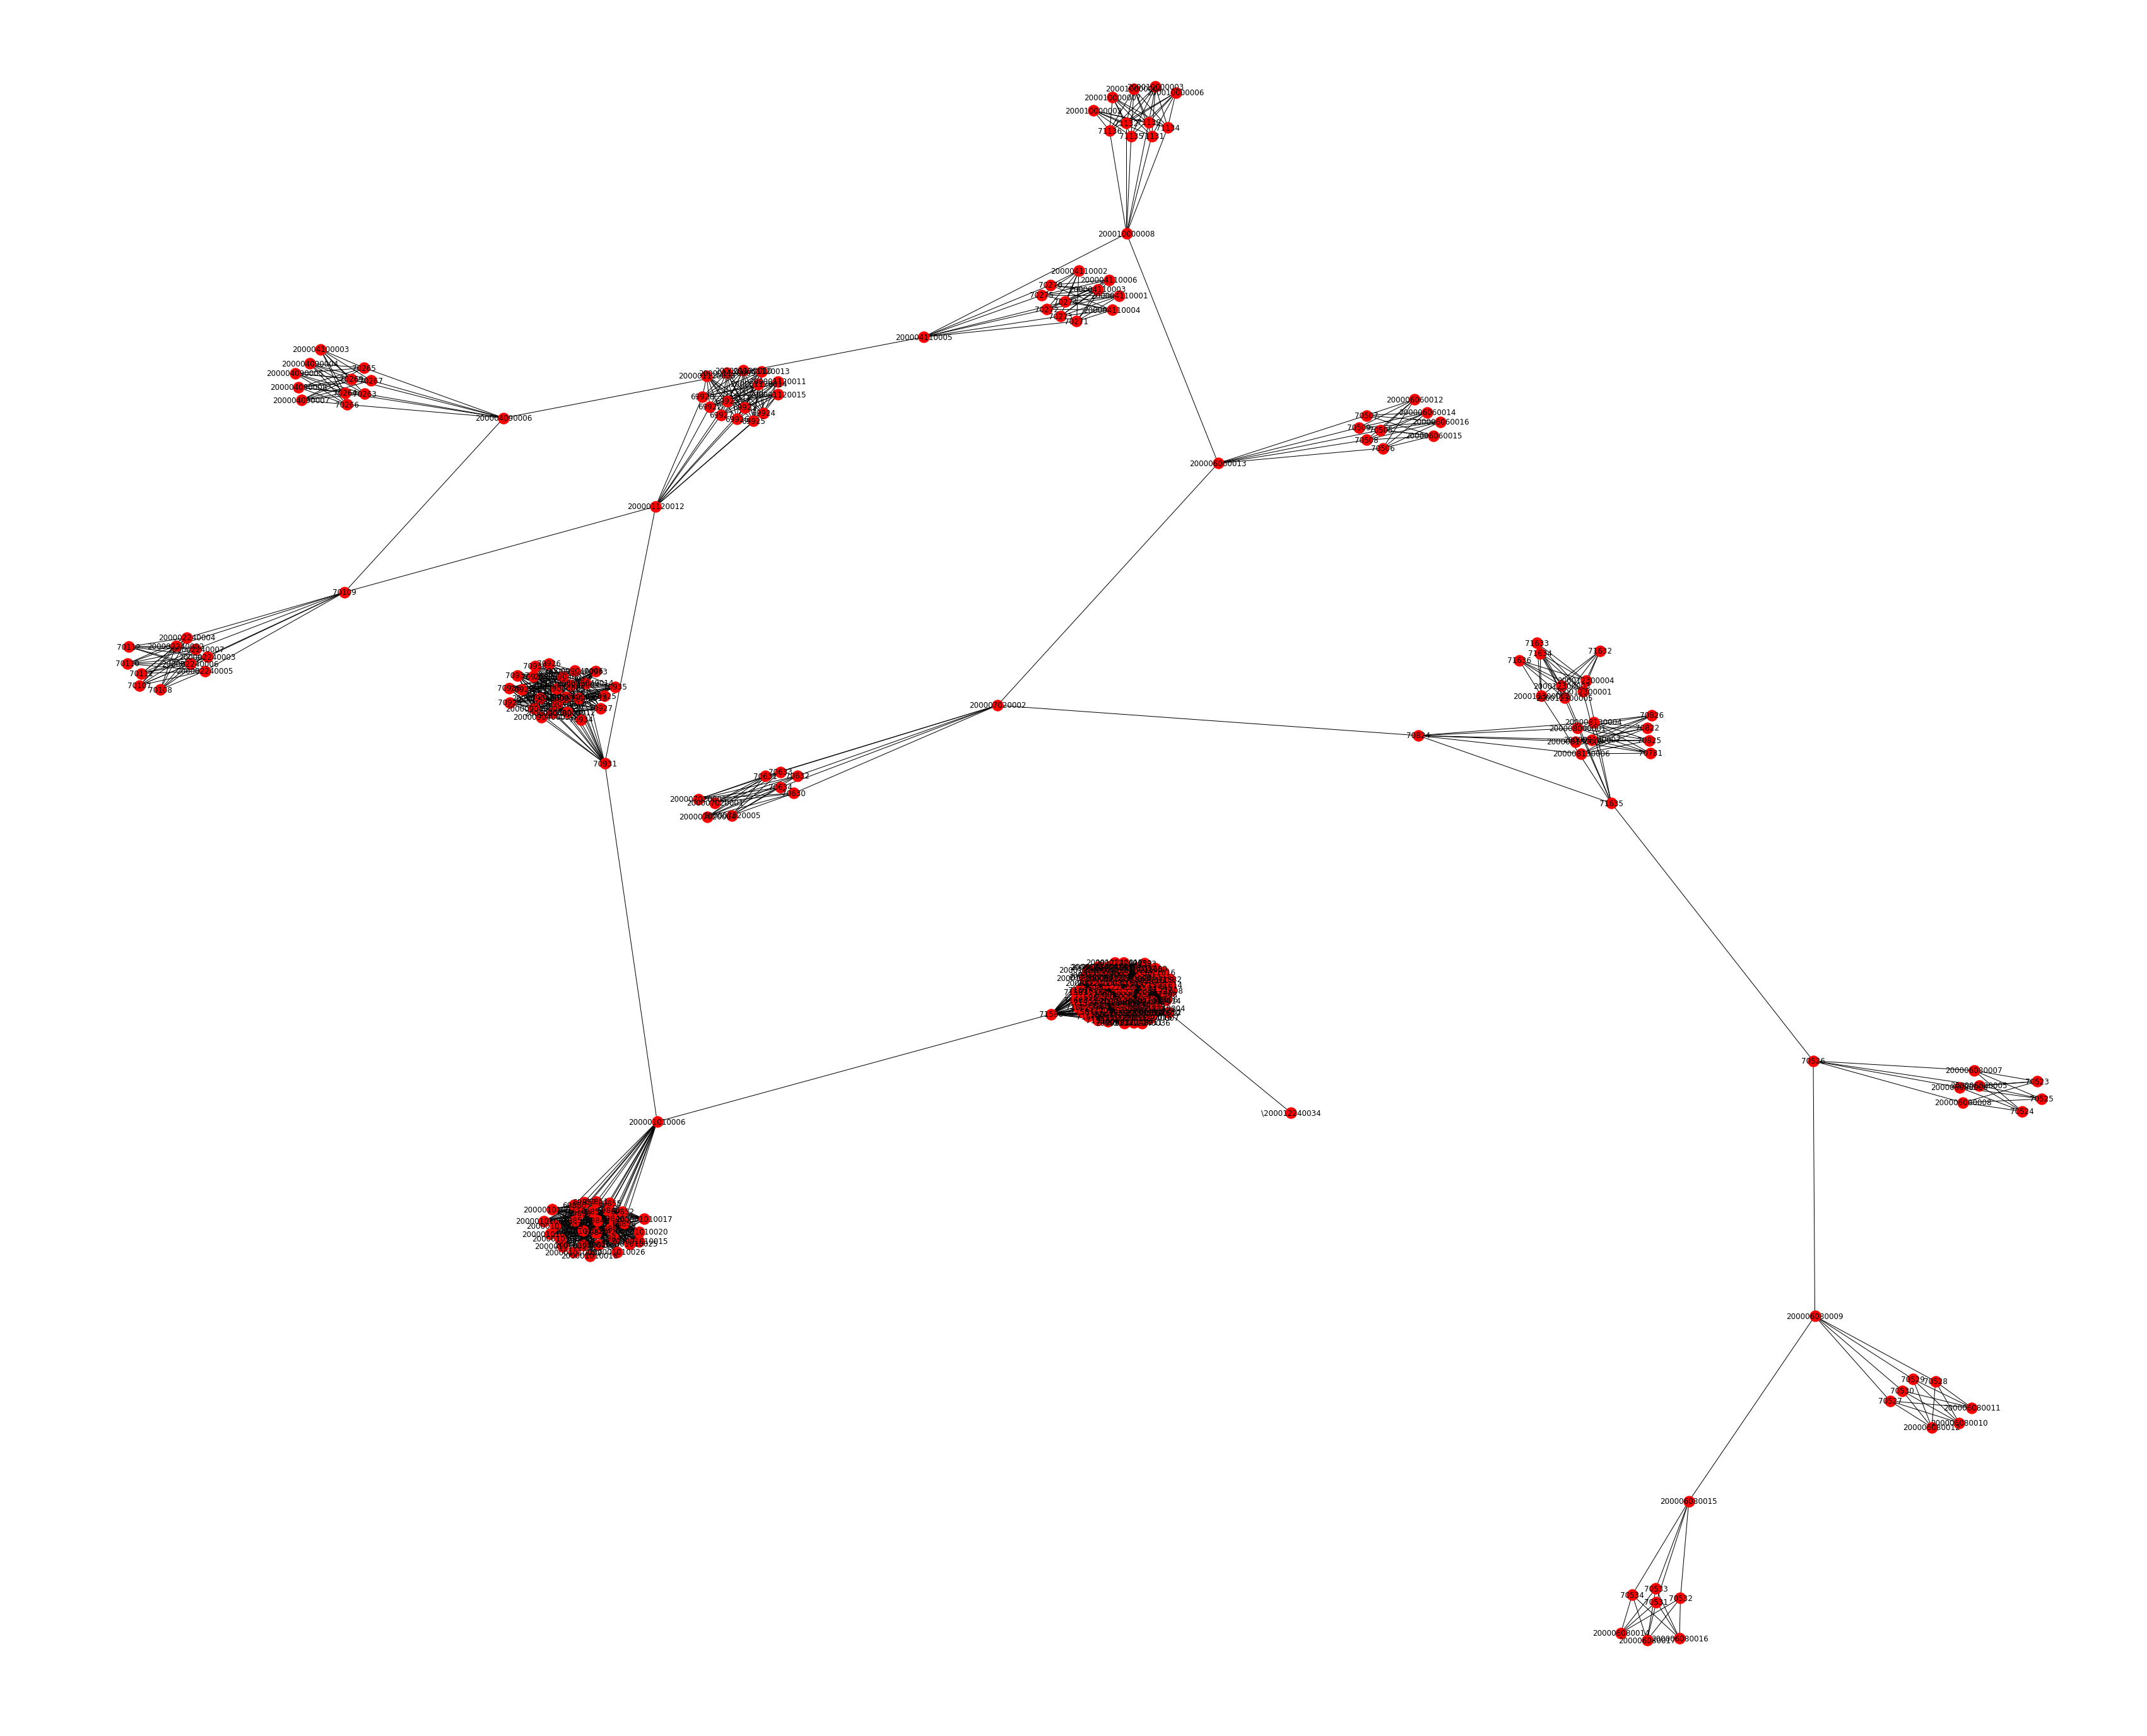

In [46]:
graph_2000 = max(nx.connected_component_subgraphs(graph_2000), key = len)
print(type(graph_2000))
fig = plt.figure(figsize=(60, 50))
ax = fig.add_subplot(1, 1, 1)
nx.draw(graph_2000, ax=ax, with_labels=True)

In [47]:
nx.is_connected(graph_2000)

True

Граф связный

In [48]:
list(nx.isolates(graph_2000))

[]

Изолированных вершин нет

In [49]:
list(graph_2000.selfloop_edges())

[]

петель нет

In [50]:
# ищем мульти ребра
arr = np.asarray(list(graph_2000.edges()))
arr = np.core.defchararray.add(np.core.defchararray.add(arr[:, 0], [',' for i in range(len(arr))]), arr[:, 1])

unique_edges, counts = np.unique(arr, return_counts=True)
flag = -1
for i in range(len(counts)):
    if counts[i] != 1:
        flag = i
        print(i)
if flag == -1:
    print('Graph doesn`t have multiple edges')

Graph doesn`t have multiple edges


In [61]:
def measure(v1, v2):
    c1 = min(v1, (v1+v2)/ 2)
    c2 = min(v2, (v1+v2)/ 2)
    return 1. * c1 / c2

# Graph edit distance

# 5. Diameter(0.2)

In [62]:
def diameter(graph):
    length = nx.all_pairs_shortest_path_length(graph)
    lst = list(length)
    max_2010 = 0
    for i in range(len(lst)):
        if type(lst[i][1]) is dict:
            for elem in lst[i][1].values():
                if elem > max_2010:
                    max_2010 = elem
    return max_2010

d1 = diameter(graph_2010)
d2 = diameter(graph_2000)
print('Diameter of graph_2010: {}'.format(d1))
print('Diameter of graph_2000: {}'.format(d2))

Diameter of graph_2010: 18
Diameter of graph_2000: 19


In [63]:
print(measure(d1, d2))

0.972972972972973


# Eccentricity(0.2)

In [52]:
def eccentricity(graph):
    length = nx.all_pairs_shortest_path_length(graph)
    lst = list(length)
    maxx = []
    for i in range(len(lst)):
        max_v = 0
        if type(lst[i][1]) is dict:
            for elem in lst[i][1].values():
                if elem > max_v:
                    max_v = elem
        maxx.append([lst[i][0], max_v])
    return maxx
print('\nEccentricity of graph_2010: {}\n'.format(eccentricity(graph_2010)))
print('\nEccentricity of graph_2000: {}\n'.format(eccentricity(graph_2000)))


Eccentricity of graph_2010: [['201004060013', 13], ['201012160013', 11], ['201006120016', 14], ['98904', 15], ['201001180017', 11], ['201001010010', 13], ['99033', 10], ['98855', 13], ['98905', 15], ['99514', 12], ['201001010014', 13], ['201007130011', 16], ['98901', 15], ['97881', 18], ['95324', 16], ['201005110011', 12], ['201011020014', 14], ['96437', 13], ['94881', 12], ['201002130010', 15], ['97872', 18], ['201005110010', 12], ['94885', 14], ['98884', 15], ['201009050033', 16], ['97886', 18], ['99515', 12], ['201004060016', 15], ['201008250042and201008250043', 17], ['99037', 10], ['201007130009', 16], ['201011020023', 16], ['201008250041', 17], ['98892', 15], ['201011020029', 16], ['95998', 14], ['95328', 16], ['201011100022', 11], ['201006120014', 14], ['201011020021', 16], ['201008250035', 17], ['96210', 17], ['97873', 18], ['201001010009', 13], ['96444', 13], ['201005190020', 11], ['95994', 14], ['201009050038', 16], ['95997', 14], ['201012160011', 13], ['201009050037', 16], [

# Periphery(0.2)

In [53]:
def periphery(ecc):
    maxx = 0
    res = []
    for elem in ecc:
        if elem[1] > maxx:
            maxx = elem[1]
            res = []
            res.append(elem[0])
        elif elem[1] == maxx:
            res.append(elem[0])
            
    return maxx, res

print('\nPeriphery of graph_2010: {}\n'.format(periphery(eccentricity(graph_2010))))
print('\nPeriphery of graph_2000: {}\n'.format(periphery(eccentricity(graph_2000))))


Periphery of graph_2010: (18, ['97881', '97872', '97886', '97873', '97877', '97880', '97883', '97889', '97887', '97874', '97878', '201004230001', '97875', '97870', '201004230006', '97882', '97871', '97884', '97876', '97865', '97868', '201004230004', '201004230007', '97869', '97879', '97885', '97888', '97867'])


Periphery of graph_2000: (19, ['200006080017', '200006080014', '200006080016', '\\200012240034'])



# Girth(0.2)

# 6. Wiener_index (2)

In [64]:
def wiener_index(graph):
    length = nx.all_pairs_shortest_path_length(graph)
    lst = list(length)
    sum_2010 = 0
    for i in range(len(lst)):
        if type(lst[i][1]) is dict:
            for elem in lst[i][1].values():
                sum_2010 += elem
    return sum_2010
w1 = wiener_index(graph_2010)
w2 = wiener_index(graph_2000)
print('Wiener index of graph_2010: {}'.format(w1))
print('Wiener index of graph_2000: {}'.format(w2))

Wiener index of graph_2010: 641124
Wiener index of graph_2000: 515096


In [65]:
print(measure(w1, w2))

1.1223344774566295


# 7. Hosoya_index(2)

In [55]:
print(nx.algorithms.has_bridges(graph_2000))
print(nx.algorithms.has_bridges(graph_2010))


True
True


In [95]:
#http://jmathnano.sru.ac.ir/article_469_99637a57bcb6d7df54ad31c6c5cec821.pdf

def k_matching(graph, k):
    if k == 0:
        return 1
    if len(list(graph.edges)) < k:
        return 0
    
    edge = list(graph.edges)[0]
    g1 = graph.copy()
    g2 = graph.copy()
    g1.remove_edge(edge[0], edge[1])
    first = k_matching(g1, k)
    graph.remove_nodes_from(list(edge))
    second = k_matching(g2, k - 1)
    return first + second


def all_hos(graph):
    answer = 0
    k = 1
    for i in range(int(len(graph.nodes) / 2)):
        tmp = k_matching(graph, i)
        if tmp == 0:
            break
        answer += tmp
    return answer

def hos(graph):
    bridges = list(nx.algorithms.bridges(graph))
    g = graph.copy()
    if len(bridges) == 0:
        return all_hos(graph)
    edge = bridges[0]
    
    g.remove_edge(edge[0], edge[1])
    g1 = g.subgraph(nx.node_connected_component(g, edge[0]))
    g2 = g.subgraph(nx.node_connected_component(g, edge[1]))
    h1 = hos(g1.copy())
    h2 = hos(g2.copy())
    g_1 = g1.copy()
    g_2 = g2.copy()
    g_1.remove_node(edge[0])
    g_2.remove_node(edge[1])
    
    return h1 * h2 + hos(g_1) * hos(g_2)
h1 = hos(graph_2010)
h2 = hos(graph_2000)
print('Индекс Хосойи для графа 2010 = {}'.format(h1))
print('Индекс Хосойи для графа 2000 = {}'.format(h2))

Индекс Хосойи для графа 2010 = 56
Индекс Хосойи для графа 2000 = 78


In [97]:
print(measure(h1, h2))

0.717948717948718


если мера сильно больше или сильно меньше 1, значит графы не похожи, иначе - похожи.